In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
advertising_file_path= "./csv/advertising.csv"
advertising = pd.read_csv(advertising_file_path)
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

,Sales,variable,value
0,22.1,TV,230.1
1,10.4,TV,44.5
2,12.0,TV,17.2
3,16.5,TV,151.5
4,17.9,TV,180.8
...,...,...,...
595,7.6,Newspaper,13.8
596,14.0,Newspaper,8.1
597,14.8,Newspaper,6.4
598,25.5,Newspaper,66.2


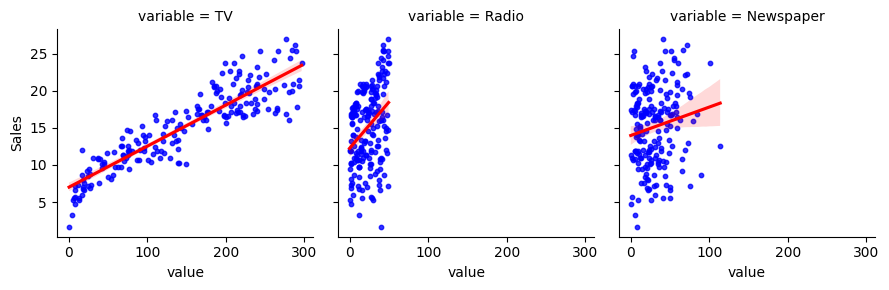

In [4]:
advertising_grid = pd.melt(advertising, id_vars="Sales", value_vars=["TV", "Radio", "Newspaper"])
g = sns.FacetGrid(advertising_grid, col="variable")
g.map(sns.regplot, "value", "Sales", ci=95, scatter_kws={"color": "blue", "s": 10},
      line_kws={"color":"red"})
advertising_grid

<Axes: xlabel='TV', ylabel='Sales'>

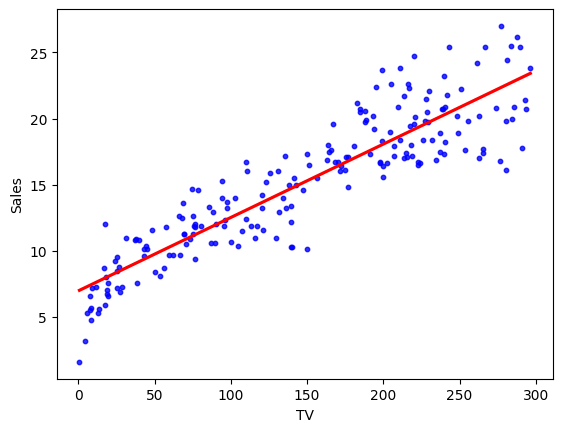

In [ ]:
sns.regplot(data=advertising, x="TV", y="Sales", ci=95, scatter_kws={"color": "blue", "s": 10}, line_kws={"color": "red"})

<Axes: xlabel='Radio', ylabel='Sales'>

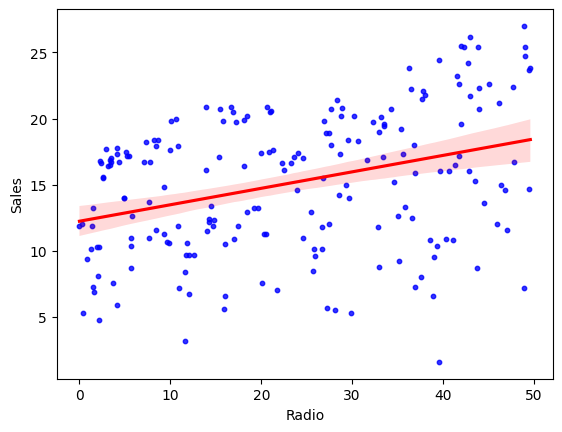

In [10]:
sns.regplot(data=advertising, x="Radio", y="Sales", ci=95, scatter_kws={"color": "blue", "s": 10}, line_kws={"color": "red"})

<Axes: xlabel='Newspaper', ylabel='Sales'>

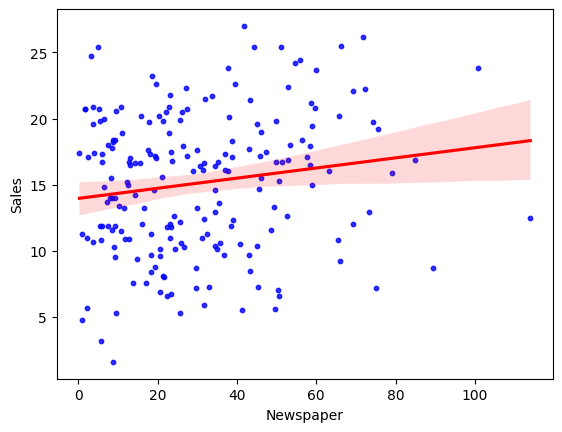

In [11]:
sns.regplot(data=advertising, x="Newspaper", y="Sales", ci=95, scatter_kws={"color": "blue", "s": 10}, line_kws={"color": "red"})

In [13]:
beta_0=6.975
beta_1=0.055

mean_y=advertising.Sales.mean()
mean_y

tss_i=advertising.Sales.apply(lambda yi: (yi-mean_y)**2)
tss = tss_i.sum()
tss

y_hat_i=beta_0+beta_1*advertising.TV
y_hat_i

i_count = advertising.shape[0]
rss_i= [(advertising.Sales[i]-y_hat_i[i])**2 for i in range(i_count)]

rss = sum(rss_i)
rss

r2=(tss-rss)/tss

print("R2: ",np.round(r2,3))

R2:  0.812


In [14]:
import statsmodels.api as sm

In [15]:
X_t=np.array(advertising.TV, ndmin=2)
X=np.transpose(X_t)
y=advertising.Sales

X=sm.add_constant(X)

model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sun, 18 May 2025   Prob (F-statistic):           7.93e-74
Time:                        14:19:38   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

## 📊 Análisis de Resultados del Modelo de Regresión Lineal

A continuación se presenta un análisis detallado del resultado del método `.summary()` aplicado a un modelo de regresión lineal simple (una variable independiente).

---

### 🧾 Información General del Modelo

| Métrica                 | Valor                      | Interpretación |
|-------------------------|----------------------------|----------------|
| **Dep. Variable**       | `Sales`                    | Variable dependiente: ventas. |
| **Model**               | `OLS` (Ordinary Least Squares) | Método de regresión lineal por mínimos cuadrados. |
| **No. Observations**    | 200                        | Número de observaciones en el dataset. |
| **Df Residuals**        | 198                        | Grados de libertad residuales (200 - 2 parámetros). |
| **Df Model**            | 1                          | Solo hay una variable predictora. |
| **R-squared**           | **0.812**                  | El 81.2% de la varianza en `Sales` es explicada por el modelo. |
| **Adj. R-squared**      | 0.811                      | R² ajustado por número de predictores; muy cercano a R², lo que sugiere un modelo ajustado correctamente. |
| **F-statistic**         | 856.2                      | Estadístico F del modelo. |
| **Prob (F-statistic)**  | 7.93e-74                   | Valor p extremadamente bajo: el modelo es altamente significativo. |
| **AIC / BIC**           | 902.0 / 908.6              | Criterios de información, útiles para comparar modelos (menor es mejor). |

---

### 📐 Coeficientes del Modelo

| Parámetro | Coeficiente | Std. Error | t-valor | Valor-p | Intervalo 95% |
|-----------|-------------|------------|---------|---------|----------------|
| **const** | 6.9748      | 0.323      | 21.624  | 0.000   | [6.339, 7.611] |
| **x1**    | 0.0555      | 0.002      | 29.260  | 0.000   | [0.052, 0.059] |

**Interpretación:**
- El intercepto (`const`) indica que si la inversión en publicidad es 0, se espera que las ventas sean aproximadamente **6.97 unidades**.
- Por cada unidad adicional de inversión en publicidad (en este caso TV), las ventas aumentan en promedio **0.0555 unidades**.
- Ambos coeficientes son altamente significativos (**valor p < 0.05**).

---

### 📊 Pruebas de Supuestos y Calidad del Modelo

| Métrica           | Valor      | Interpretación |
|-------------------|------------|----------------|
| **Omnibus**       | 0.013      | Prueba de normalidad de residuos. Valor bajo → residuos normales. |
| **Prob(Omnibus)** | 0.993      | > 0.05 → no se rechaza la normalidad. |
| **Jarque-Bera**   | 0.043      | Alternativa a Omnibus. Valor bajo y p-alto. |
| **Prob(JB)**      | 0.979      | Confirma que los residuos son normales. |
| **Skew**          | -0.018     | Asimetría casi nula → distribución simétrica. |
| **Kurtosis**      | 2.938      | Cercana a 3 → curtosis de una normal. |
| **Durbin-Watson** | 2.029      | Cerca de 2 → no hay autocorrelación en los residuos. |
| **Cond. No.**     | 338        | < 1000 → no hay problemas graves de multicolinealidad. |

---

### ✅ Conclusión

El modelo presenta un **excelente ajuste** con un R² de **0.812**, y el coeficiente del predictor (TV) es altamente significativo. Los residuos cumplen con los supuestos de normalidad y no hay evidencia de autocorrelación. Es un **modelo válido y confiable** para predecir ventas a partir de la inversión en televisión.

---


## 🧮 Fórmulas de las Métricas del Modelo de Regresión Lineal (`.summary()`)

A continuación se presentan las fórmulas utilizadas para calcular las métricas clave que aparecen en el resumen del modelo `OLS` (mínimos cuadrados ordinarios).

---

### 📌 1. Coeficientes de Regresión

Sea $X$ la matriz de predictores (con constante) y $y$ el vector de la variable dependiente:

$$
\hat{\beta} = (X^TX)^{-1}X^Ty
$$

---

### 📊 2. Predicciones

Predicciones del modelo para cada observación:

$$
\hat{y} = X \hat{\beta}
$$

---

### 🎯 3. Error Cuadrático Total (Suma de Cuadrados Total)

Cantidad total de variación en los datos:

$$
SS_{tot} = \sum_{i=1}^n (y_i - \bar{y})^2
$$

---

### 📉 4. Suma de Cuadrados del Residuo (Error)

Mide la discrepancia entre los valores observados y los predichos:

$$
SS_{res} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

---

### 📈 5. Coeficiente de Determinación ($R^2$)

Proporción de la varianza explicada por el modelo:

$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

---

### 🧮 6. $R^2$ Ajustado

Corrige $R^2$ teniendo en cuenta el número de predictores $k$ y el número de observaciones $n$:

$$
R^2_{adj} = 1 - \left( \frac{SS_{res}/(n - k - 1)}{SS_{tot}/(n - 1)} \right)
$$

---

### 📏 7. Error Estándar de los Coeficientes

Se obtiene de la raíz cuadrada de la diagonal de la matriz de varianza-covarianza de los coeficientes:

$$
\text{SE}(\hat{\beta}) = \sqrt{ \hat{\sigma}^2 (X^T X)^{-1} }
$$

donde

$$
\hat{\sigma}^2 = \frac{SS_{res}}{n - k - 1}
$$

---

### 🧪 8. Estadístico t para cada coeficiente

Para evaluar si un coeficiente es significativamente distinto de 0:

$$
t = \frac{\hat{\beta}_j}{SE(\hat{\beta}_j)}
$$

---

### 📉 9. Valor-p (P>|t|)

Probabilidad de obtener un valor de $t$ igual o más extremo si $H_0: \beta_j = 0$ es cierta.

---

### 🔢 10. Intervalo de Confianza del 95%

Para cada coeficiente:

$$
\hat{\beta}_j \pm t_{\alpha/2, df} \cdot SE(\hat{\beta}_j)
$$

---

### 🧪 11. Estadístico F del Modelo

Evalúa si el modelo completo tiene poder predictivo:

$$
F = \frac{(SS_{tot} - SS_{res})/k}{SS_{res}/(n - k - 1)} = \frac{R^2 / k}{(1 - R^2)/(n - k - 1)}
$$

---

### 📐 12. Durbin-Watson (Autocorrelación de los residuos)

Evalúa si hay correlación entre residuos consecutivos:

$$
DW = \frac{\sum_{i=2}^n (e_i - e_{i-1})^2}{\sum_{i=1}^n e_i^2}
$$

donde $e_i = y_i - \hat{y}_i$

---

### 📊 13. Omnibus / Jarque-Bera (Normalidad de residuos)

- Omnibus combina asimetría y curtosis.
- Jarque-Bera:

$$
JB = \frac{n}{6} \left( S^2 + \frac{(K - 3)^2}{4} \right)
$$

donde:
- $S$: Asimetría
- $K$: Curtosis

---

Estas métricas permiten evaluar tanto el **ajuste global del modelo**, como la **significancia estadística** de cada predictor y la validez de los supuestos de regresión lineal.



## 🧠 Mapa Conceptual de las Métricas de Regresión Lineal

Este esquema resume las principales métricas y pruebas estadísticas entregadas por `.summary()` de `statsmodels`, y cómo se relacionan entre sí.

---

```text
                  +---------------------------+
                  |   Modelo de Regresión     |
                  |      Lineal OLS           |
                  +------------+--------------+
                               |
                               v
        +----------------------+----------------------+
        |                     Ajuste                  |
        +----------------------+----------------------+
        | Coeficientes β       |  R² y R² Ajustado     |
        |  - Intercepto        |  - Proporción de      |
        |  - Pendiente(s)      |    varianza explicada |
        +----------------------+----------------------+
                               |
                               v
        +----------------------+----------------------+
        |           Evaluación de Significancia       |
        +----------------------+----------------------+
        | t-valor              | F-estadístico         |
        | Valor-p (P>|t|)      | Valor-p F             |
        | Intervalo 95% CI     |                       |
        +----------------------+----------------------+
                               |
                               v
        +----------------------+----------------------+
        |      Supuestos del Modelo y Diagnóstico     |
        +----------------------+----------------------+
        | Normalidad de errores  |   Independencia     |
        | - Jarque-Bera (JB)     | - Durbin-Watson     |
        | - Omnibus              |                      |
        | - Skew / Kurtosis      |                      |
        +------------------------+---------------------+
                               |
                               v
        +------------------------+
        |    Métricas de Penalización (Comparación)   |
        |    - AIC (Akaike Information Criterion)     |
        |    - BIC (Bayesian Information Criterion)   |
        +------------------------+

